In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
from sklearn.linear_model import LinearRegression

In [2]:
column_dtypes = {'sexe': 'uint8',
                 'preusuel': 'object',
                 'annais': 'object',
                 'dpt': 'object',
                 'nombre': 'uint32'}

df = pd.read_csv( 'dpt2017.txt', sep='\t', dtype = column_dtypes)

df = df[df['preusuel'] != '_PRENOMS_RARES']
df.head()

,sexe,preusuel,annais,dpt,nombre
0,1,A,XXXX,XX,28
1,1,AADAM,XXXX,XX,24
2,1,AADEL,XXXX,XX,55
3,1,AADIL,1983,84,3
4,1,AADIL,1992,92,3


In [3]:
# filter out rows with invalid years

extr = df['annais'].str.extract(r'^(\d{4})', expand=False)
df['annais'] = pd.to_numeric(extr)  # downcast='unsigned' not working

df = df.dropna()

df = df[df['annais'] > 1960]

df['annais'] = df['annais'].astype('uint16')

df.head()

# data.to_csv(‘cleanfile.csv’ encoding=’utf-8’)

,sexe,preusuel,annais,dpt,nombre
3,1,AADIL,1983,84,3
4,1,AADIL,1992,92,3
7,1,AARON,1962,75,3
8,1,AARON,1976,75,3
9,1,AARON,1982,75,3


In [4]:
# to_numeric on departments

df['dpt'] = pd.to_numeric(df['dpt']).astype('uint16')


In [5]:
# remove accents in string columns

def normalize(x):
    return x.str.upper().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

str_cols = df.select_dtypes(include=[np.object]).columns
df[str_cols] = df[str_cols].apply(normalize)

df.head()

,sexe,preusuel,annais,dpt,nombre
3,1,AADIL,1983,84,3
4,1,AADIL,1992,92,3
7,1,AARON,1962,75,3
8,1,AARON,1976,75,3
9,1,AARON,1982,75,3


In [6]:
# TODO filter where dpt or annais is not a number

df.describe()

,sexe,annais,dpt,nombre
count,2.298579e+06,2.298579e+06,2.298579e+06,2.298579e+06
mean,1.516634e+00,1.992441e+03,9.561396e+01,1.693933e+01
std,4.997233e-01,1.611700e+01,1.936636e+02,4.063601e+01
min,1.000000e+00,1.961000e+03,1.000000e+00,3.000000e+00
25%,1.000000e+00,1.979000e+03,3.300000e+01,4.000000e+00
50%,2.000000e+00,1.994000e+03,5.900000e+01,6.000000e+00
75%,2.000000e+00,2.007000e+03,7.800000e+01,1.500000e+01
max,2.000000e+00,2.017000e+03,9.740000e+02,4.055000e+03


In [7]:
df.dtypes

sexe         uint8
preusuel    object
annais      uint16
dpt         uint16
nombre      uint32
dtype: object

In [8]:
df['preusuel'].value_counts()

CAMILLE          6563
JEROME           6044
MARIE            5472
PIERRE           5376
RAPHAEL          5274
CEDRIC           5233
NICOLAS          5227
ANTOINE          5133
ALEXANDRE        5037
JEREMY           5017
MICKAEL          4986
ANGELIQUE        4897
VINCENT          4843
DAVID            4828
THOMAS           4793
PAUL             4763
LAETITIA         4725
SOPHIE           4705
JEAN             4704
SARAH            4691
EMILIE           4657
KEVIN            4649
CLAIRE           4621
GAELLE           4620
SAMUEL           4569
GUILLAUME        4511
JULIEN           4492
GREGORY          4485
MAXIME           4482
MATHIEU          4450
                 ... 
KITTY               1
NAELLYA             1
FIDELINE            1
MAYLINA             1
BENTLEY             1
KHALEESI            1
EMRIC               1
CHOCHANA            1
KYANN               1
JIHANNE             1
SEYNI               1
MANECK              1
SIBILLE             1
NOIRA               1
BARTOSZ   

In [9]:
nb_preusuel_df = df.groupby(
    ['sexe', 'preusuel']
).agg(
    {
         'nombre':sum,
         'annais': "mean"
    }
).sort_values(by='nombre', ascending=False)

print("\ntop:")
print(nb_preusuel_df.head(20))

print("\nHELOISE:")
print(nb_preusuel_df.loc[(2, 'HELOISE')].head())

print("\nELOISE:")
print(nb_preusuel_df.loc[(2, 'ELOISE')].head())

print("\nNATHAN:")
print(nb_preusuel_df.loc[(1, 'NATHAN')].head())

print("\nFLORIAN:")
print(nb_preusuel_df.loc[(1, 'FLORIAN')].head())


top:
                 nombre       annais
sexe preusuel                       
1    NICOLAS     386471  1988.034437
2    NATHALIE    369125  1978.874926
1    CHRISTOPHE  359553  1981.372265
2    MARIE       341927  1988.550065
     ISABELLE    312016  1979.807102
1    DAVID       305369  1987.836993
     PHILIPPE    301466  1980.475849
     SEBASTIEN   298747  1986.854879
     STEPHANE    293334  1981.793501
     FREDERIC    291134  1980.781690
     JULIEN      288518  1991.477070
     LAURENT     288323  1980.725193
     THOMAS      270427  1992.384969
2    SYLVIE      262840  1976.056683
1    ERIC        261504  1980.099353
     ALEXANDRE   261157  1990.594600
     OLIVIER     250592  1983.078625
2    VALERIE     244855  1976.858710
     SANDRINE    238148  1979.008189
     STEPHANIE   232052  1982.867651

HELOISE:
nombre    19387.000000
annais     2000.128182
Name: (2, HELOISE), dtype: float64

ELOISE:
nombre    26982.000000
annais     2001.147427
Name: (2, ELOISE), dtype: float64


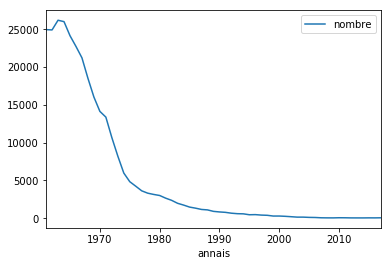

In [10]:
df[
    df['preusuel'] == 'PHILIPPE'
].groupby(
    'annais'
).agg(
    { 'nombre':sum } 
).sort_values(
    by='annais', ascending=False
).plot()

#plt.hist( nb_preusuel_df.nombre )

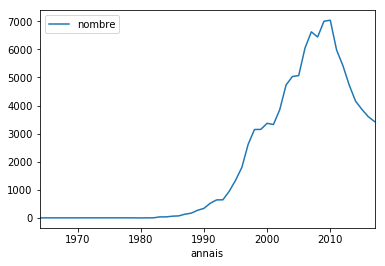

In [11]:
df[
    df['preusuel'] == 'NATHAN'
].groupby(
    'annais'
).agg(
    { 'nombre':sum } 
).sort_values(
    by='annais', ascending=False
).plot()

In [12]:
# ecart type sur le nombre
nb_preusuel_df = df.groupby(
    ['sexe', 'preusuel']
).agg(
    {
         'nombre':"std"  # pas sur que ce soit correct
    }
).sort_values(by='nombre', ascending=False)

print("\ntop:")
print(nb_preusuel_df.head(20))

print("\nHELOISE:")
print(nb_preusuel_df.loc[(2, 'HELOISE')].head())

print("\nELOISE:")
print(nb_preusuel_df.loc[(2, 'ELOISE')].head())

print("\nNATHAN:")
print(nb_preusuel_df.loc[(1, 'NATHAN')].head())

print("\nFLORIAN:")
print(nb_preusuel_df.loc[(1, 'FLORIAN')].head())


top:
                     nombre
sexe preusuel              
2    NATHALIE    212.844826
     MARIE       203.475664
     SYLVIE      182.987743
1    PHILIPPE    179.398237
2    ISABELLE    176.631274
     VALERIE     167.941381
1    PASCAL      155.792344
2    CATHERINE   151.889191
1    THIERRY     148.821810
     ERIC        146.023350
     CHRISTOPHE  140.966715
     LAURENT     137.150074
2    VERONIQUE   131.261641
1    STEPHANE    124.559423
     JEAN        124.333966
2    SANDRINE    119.910908
1    FREDERIC    118.461269
2    CHRISTINE   117.676682
     CORINNE     114.265984
1    PATRICK     106.874995

HELOISE:
nombre    9.342488
Name: (2, HELOISE), dtype: float64

ELOISE:
nombre    8.110893
Name: (2, ELOISE), dtype: float64

NATHAN:
nombre    40.272421
Name: (1, NATHAN), dtype: float64

FLORIAN:
nombre    37.652248
Name: (1, FLORIAN), dtype: float64


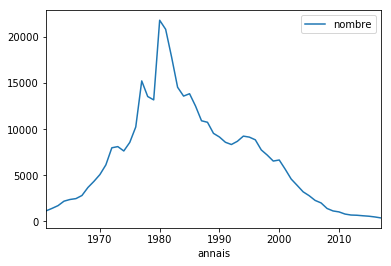

In [13]:
df[
    df['preusuel'] == 'NICOLAS'
].groupby(
    'annais'
).agg(
    { 'nombre':sum } 
).sort_values(
    by='annais', ascending=False
).plot()

In [14]:
df[
    df['preusuel'] == 'NICOLAS'
].groupby(
    'annais'
).agg(
    { 
        'nombre':sum
    } 
).sort_values(
    by='annais', ascending=False
).reset_index(level=['annais']).corr().abs()
    

,annais,nombre
annais,1.000000,0.309386
nombre,0.309386,1.000000


In [15]:
df.groupby(
    ['preusuel','annais']
).agg(
    { 
        'nombre':sum
    } 
)
#.sort_values(
#    by='annais', ascending=False
#).head()


nombre
preusuel annais        
AADIL    1983         3
         1992         3
AALIYA   2017         3
AALIYAH  2001         9
         2002        29
         2003        40
         2004        29
         2005        30
         2006        24
         2007        33
         2008        41
         2009        49
         2010        69
         2011        94
         2012       123
         2013       102
         2014       159
         2015       141
         2016       145
         2017       149
AALYA    2010         3
AALYAH   2009         3
         2010         3
         2013         3
         2014         3
AARON    1962         3
         1976         3
         1982         3
         1984         3
         1985         5
...                 ...
ZYAD     1985         6
         1988         3
         2001         6
         2002         3
         2003         4
         2004        11
         2005         4
         2006        12
         2007         8
         2008        14
         2009        37
         2010        47
         2011        28
         2012        33
         2013        43
         2014        37
         2015        53
         2016        48
         2017        42
ZYAN     2010         3
         2015         3
         2016         3
         2017         3
ZYED     1998         4
         2010         8
         2011         7
         2015         4
         2016        16
         2017         4
ZYNA     2013         3

[154805 rows x 1 columns]

In [17]:
# Creates DataFrame. 
#df = pd.DataFrame([
#    {'nom': 'john', 'nb': 2, 'year':2000}, 
#    {'nom': 'john', 'nb': 3, 'year':2001},
#    {'nom': 'rony', 'nb': 1, 'year':2001},
#    {'nom': 'samy', 'nb': 1, 'year':2002}]
#) 

counts = df.nombre.apply(lambda x: list(range(1, x + 1)))  # replace numbers by a list with x items

serie = pd.DataFrame(
    counts.tolist()  # build dataframe from a list of list
).stack(  # reorganize table to get columns names as row names (sort of)
).reset_index(
    level=1, drop=True  # remove the column 1 (the former column names)
).rename('count')  # add name so that the serie can be joined with a dataframe
     

df.join(serie).drop(['nombre', 'count'], axis=1)



MemoryError: 